<a href="https://colab.research.google.com/github/iyakiwan/NN-tensorflow/blob/master/SubmissionImageClasificationHard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Intel Image Classification**
Link Dataset : https://www.kaggle.com/puneet6060/intel-image-classification/version/2


##Penjelasan Dataset
* Dataset ini merupakan kumpulan data gambar Pemandangan Alam di seluruh dunia.
* Data ini berisi sekitar 25k gambar berukuran 150x150 yang didistribusikan dalam 6 kategori. Diantaranya: {'buildings' -> 0, 'forest' -> 1, 'glacier' -> 2, 'mountain' -> 3, 'sea' -> 4, 'street' -> 5 }
* Terdapat Data Train, Test, dan Predicion yang dipisahkan di setiap Folder. Ada sekitar 14k gambar di Train, 3k di Test dan 7k di Prediction.



In [ ]:
#Konfigurasi untung mendapatkan dataset dari kaggle
import os
os.environ['KAGGLE_USERNAME'] = "muftialiesatriawan"
os.environ['KAGGLE_KEY'] = "8758290ff1b48af9eb9f56be8b3445c5"

In [ ]:
#Download dataset
!kaggle datasets download -d puneet6060/intel-image-classification/version/2

100% 346M/346M [00:13<00:00, 40.3MB/s]
100% 346M/346M [00:13<00:00, 26.6MB/s]


In [ ]:
#Unzip dataset
!unzip -q intel-image-classification.zip -d .

##Prepossessing

In [ ]:
#Import Libary yang di perlukan
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile

In [ ]:
pip install split-folders

In [ ]:
#membagi dataset menjadi train set dan validation set
import splitfolders

splitfolders.ratio('/content/seg_train/seg_train', output="/content/model/data", seed=1337, ratio=(.8, .2))

Copying files: 14034 files [00:02, 4801.98 files/s]


In [ ]:
#Membuat variabel untuk train set dan validation set
base_dir = '/content/model/data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
#mengecek isi dari folder train
os.listdir(train_dir)

['mountain', 'forest', 'street', 'glacier', 'buildings', 'sea']

In [ ]:
#mengecek isi dari folder validation
os.listdir(validation_dir)

['mountain', 'forest', 'street', 'glacier', 'buildings', 'sea']

##Modelling dan Train Data

In [ ]:
#Augmentasi gambar menggunakan image data generator
datagen = ImageDataGenerator(
                    rescale = 1./255,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode = 'nearest')

In [ ]:
#Membuat persiapan data berdasarkan direktori yang mana atribut berada di dalam folder dan labelnya di tentukan pada bungsi clasess
train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        classes = ["buildings","forest","glacier","mountain","sea","street"],
        batch_size=32,
        class_mode='categorical')
 
validation_generator = datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150), 
        classes = ["buildings","forest","glacier","mountain","sea","street"],
        batch_size=32, 
        class_mode='categorical')

Found 11224 images belonging to 6 classes.
Found 2810 images belonging to 6 classes.


In [ ]:
#Membuat model sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [ ]:
#Melihat total params berdasarkan model yang dibuat
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
#menetukan loss function serta optimizer 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
#membuat callback dari class myCallback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.85 and logs.get('val_accuracy')>0.85):
      print("\nAkurasi telah mencapai >85%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
#pelatihan model dengan 25 step dengan data train dan data validation nya
history = model.fit(
    train_generator, 
    epochs=25,
    batch_size = 32,
    callbacks=[callbacks],
    validation_data=validation_generator)

Epoch 1/25
351/351 [==============================] - 93s 266ms/step - loss: 1.1382 - accuracy: 0.5388 - val_loss: 1.0069 - val_accuracy: 0.6320
Epoch 2/25
351/351 [==============================] - 93s 264ms/step - loss: 0.8611 - accuracy: 0.6753 - val_loss: 0.8907 - val_accuracy: 0.6648
Epoch 3/25
351/351 [==============================] - 92s 263ms/step - loss: 0.7053 - accuracy: 0.7427 - val_loss: 0.7177 - val_accuracy: 0.7431
Epoch 4/25
351/351 [==============================] - 92s 262ms/step - loss: 0.6329 - accuracy: 0.7738 - val_loss: 0.6760 - val_accuracy: 0.7580
Epoch 5/25
351/351 [==============================] - 92s 261ms/step - loss: 0.5745 - accuracy: 0.7925 - val_loss: 0.5620 - val_accuracy: 0.8007
Epoch 6/25
351/351 [==============================] - 91s 260ms/step - loss: 0.5282 - accuracy: 0.8079 - val_loss: 0.6315 - val_accuracy: 0.7662
Epoch 7/25
351/351 [==============================] - 91s 259ms/step - loss: 0.4855 - accuracy: 0.8257 - val_loss: 0.4944 - val_ac

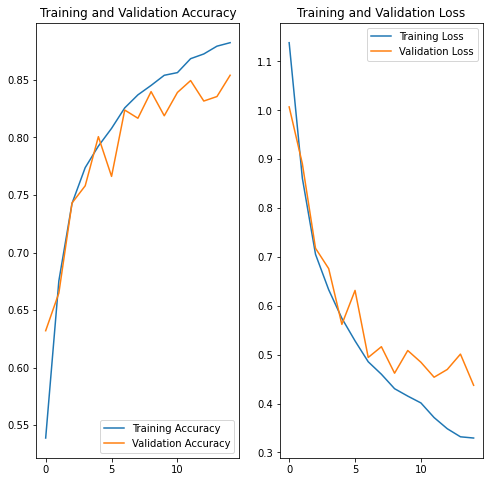

In [ ]:
#Melihat grafik dari actuasi train dan val serta lossnya menggunakan libary matplotlib.pyplot
import matplotlib.pyplot as plt
epochs = len(history.history['loss'])

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##Konfersi Model

In [ ]:
#Konfersi model menjadi model TF-Lite.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmp0kenvg4r/assets


In [ ]:
#Menyimpan model dengan format .tflite
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)